In [39]:
from sklearn import datasets
from sklearn import svm    
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [30]:
iris_dataset = datasets.load_iris()

In [47]:
df_iris=pd.DataFrame(data = iris_dataset.data, columns=['Sepal Length','Sepal width','Petal Length','Petal Width'])
df_iris['Species'] = iris_dataset.target

In [32]:
X = df_iris.drop(['Species'],axis=1)
y = df_iris['Species']

In [45]:
svm_clf = svm.SVC(gamma=.0001, C=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [46]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
kfold_svm = svm.SVC(gamma=.0001, C=1000)
scoring = 'accuracy'
results = model_selection.cross_val_score(kfold_svm, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.961


Recall metric in the testing dataset:  1.0
Confusion Metric in the testing dataset: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


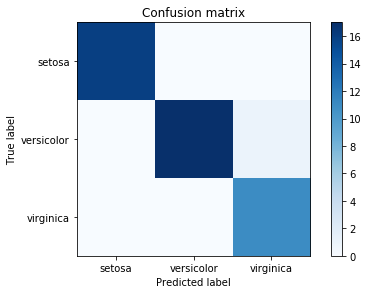

In [51]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print("Confusion Metric in the testing dataset: \n", cnf_matrix)

# Plot non-normalized confusion matrix
class_names = iris_dataset.target_names
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()